In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io

pd.set_option('display.max_columns', None)

%matplotlib inline


In [2]:
# READING DATA
content = r"C:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\data_folder\exercise_data.csv"
data = pd.read_csv(content, sep=",| ' ' ")


C:\Users\HP\AppData\Local\Temp\ipykernel_7596\544392051.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(content, sep=",| ' ' ")


In [3]:
# PRINTING THE FIRST 10 ROW OF THE DATA
data.head(10)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1
5,5,1250,39.25,0.43,24.00,0.00,33.00,0.0,bending1
6,6,1500,39.25,0.43,24.00,0.00,33.00,0.0,bending1
7,7,1750,39.00,0.00,23.75,0.43,33.00,0.0,bending1
8,8,2000,39.50,0.50,24.00,0.00,33.00,0.0,bending1
9,9,2250,39.50,0.50,23.00,0.00,33.00,0.0,bending1


In [4]:
# PRINITNG THE LAST 10 ROWS OF THE DATA
data.tail(10)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
41269,41269,117500,28.00,3.24,15.00,0.00,21.67,5.56,walking
41270,41270,117750,34.50,1.50,17.00,1.73,15.00,4.74,walking
41271,41271,118000,36.00,0.00,18.50,4.15,15.00,2.45,walking
41272,41272,118250,36.00,2.45,14.75,4.55,14.67,3.40,walking
41273,41273,118500,37.25,7.26,14.00,1.58,13.25,4.92,walking
41274,41274,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
41275,41275,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
41276,41276,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
41277,41277,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking
41278,41278,119750,32.67,3.09,18.67,0.47,14.00,3.16,walking


In [5]:
data.isnull().sum()


Unnamed: 0      0
time            0
avg_rss12     480
var_rss12     480
avg_rss13     480
var_rss13     480
avg_rss23     480
var_rss23     480
Label           0
dtype: int64

In [6]:
data.shape


(41279, 9)

In [7]:
data_with_space = data[data['avg_rss12'].isna()]


In [8]:
df = data.copy()

df = df.dropna()
df.head(5)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [9]:
df.isna().sum()


Unnamed: 0    0
time          0
avg_rss12     0
var_rss12     0
avg_rss13     0
var_rss13     0
avg_rss23     0
var_rss23     0
Label         0
dtype: int64

In [10]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,41279.0,20639.000000,11916.365218,0.0,10319.50,20639.00,30958.50,41278.00
avg_rss12,40799.0,39.075867,6.333952,0.0,35.25,40.00,44.00,56.25
var_rss12,40799.0,1.446979,2.052088,0.0,0.00,0.50,1.79,17.24
avg_rss13,40799.0,14.292679,5.430023,0.0,11.50,15.00,18.00,35.00
var_rss13,40799.0,1.478507,1.625153,0.0,0.43,0.83,2.28,11.42
avg_rss23,40799.0,15.973015,6.824112,0.0,12.00,15.75,19.25,40.33
var_rss23,40799.0,1.594910,1.620069,0.0,0.47,1.00,2.28,13.61


***Subset all dataset according to their lables***

In [11]:
bending_1_df = data[data['Label'] == 'bending1']
bending_2_df = data[data['Label'] == 'bending2']
cycling_df = data[data['Label'] == 'cycling']
lying_df = data[data['Label'] == 'lying']
sitting_df = data[data['Label'] == 'sitting']
standing_df = data[data['Label'] == 'standing']
walking_df = data[data['Label'] == 'walking']


***Bending_1 Dataframe***

In [12]:
bending_1_df.head()


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [13]:
bending_1_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3360.0,1679.500000,970.092779,0.0,839.75,1679.50,2519.25,3359.00
avg_rss12,3360.0,42.667723,2.361918,33.0,41.75,42.75,44.50,48.00
var_rss12,3360.0,0.454360,0.400185,0.0,0.00,0.47,0.50,3.00
avg_rss13,3360.0,19.158830,4.553348,1.5,16.00,19.50,23.00,30.00
var_rss13,3360.0,0.793399,0.915341,0.0,0.00,0.50,1.12,10.03
avg_rss23,3360.0,30.201982,5.761234,8.0,24.25,31.50,35.50,38.67
var_rss23,3360.0,0.552390,0.543230,0.0,0.00,0.47,0.87,5.26


In [14]:
bending_1_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3360 non-null   int64  
 1   time        3360 non-null   object 
 2   avg_rss12   3360 non-null   float64
 3   var_rss12   3360 non-null   float64
 4   avg_rss13   3360 non-null   float64
 5   var_rss13   3360 non-null   float64
 6   avg_rss23   3360 non-null   float64
 7   var_rss23   3360 non-null   float64
 8   Label       3360 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 262.5+ KB


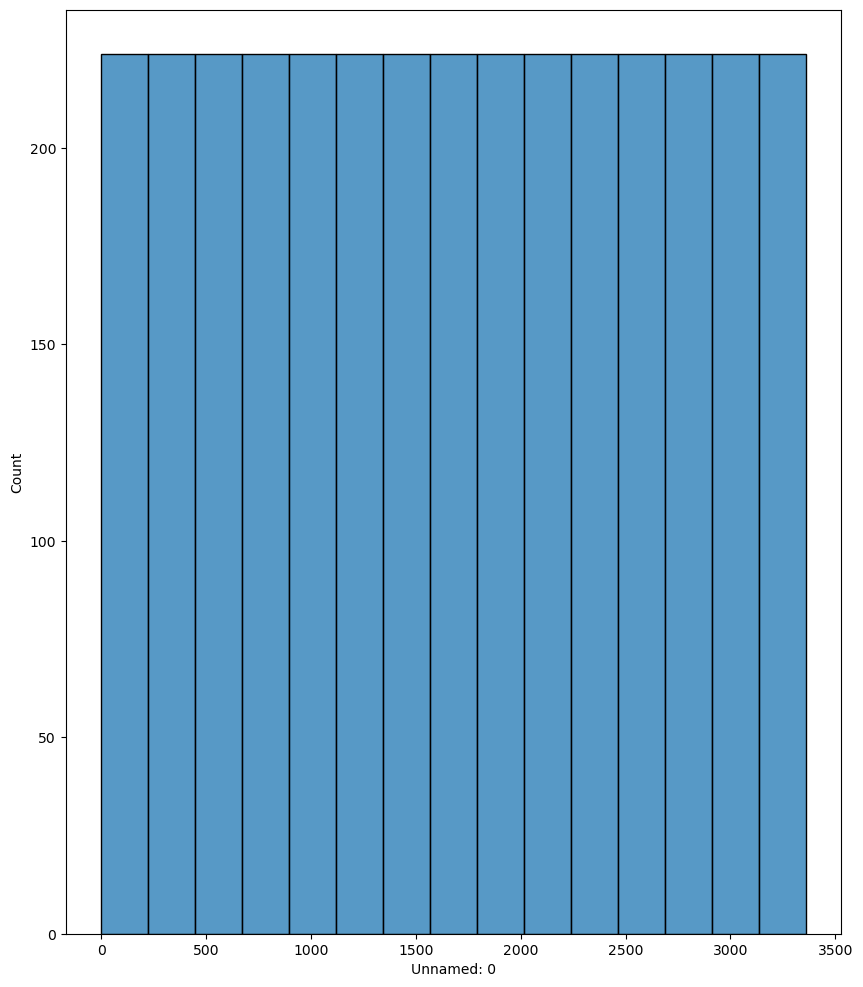

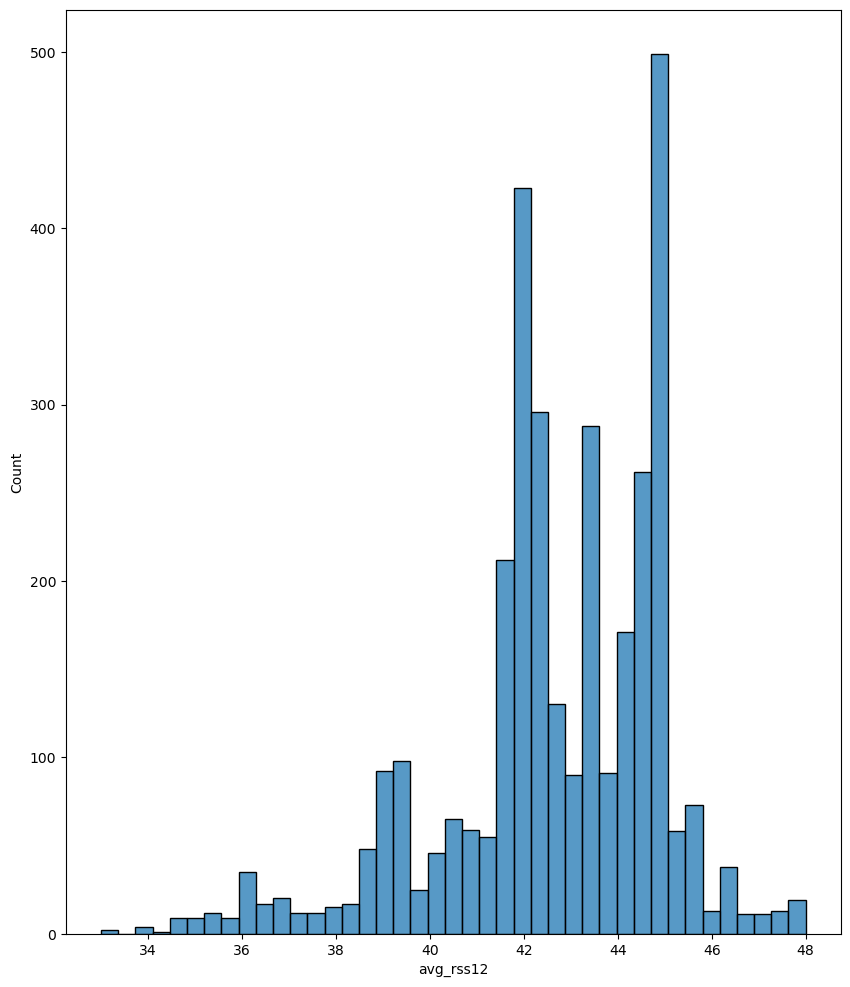

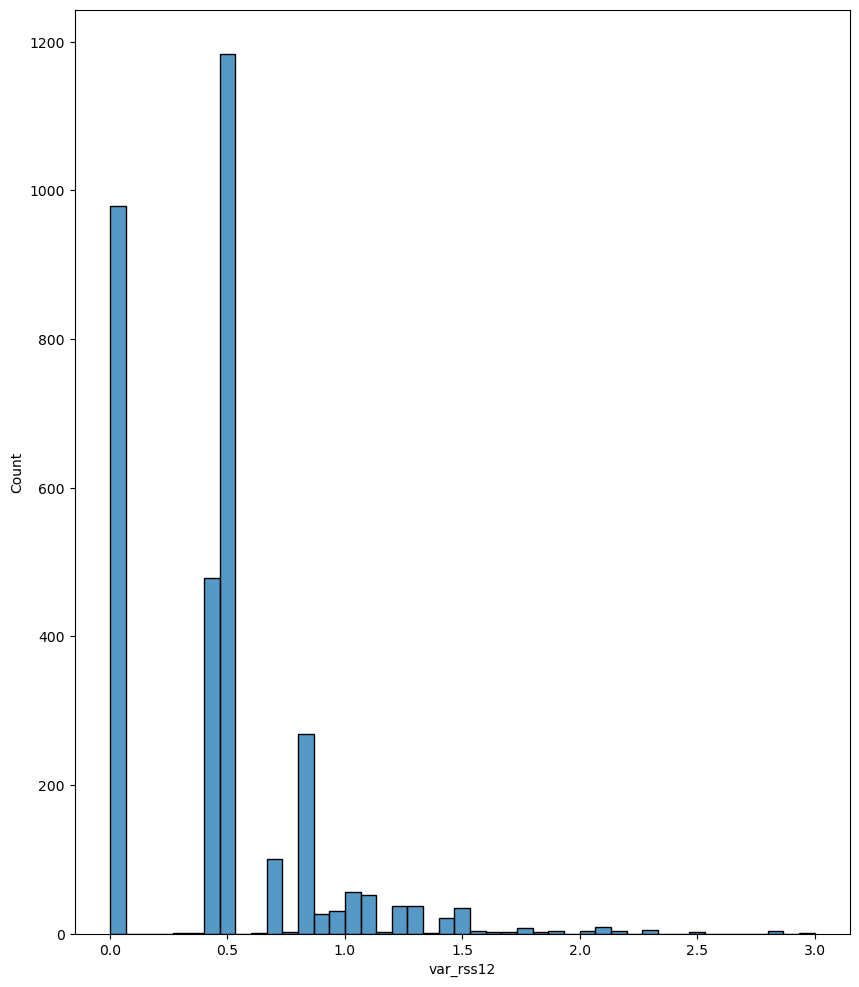

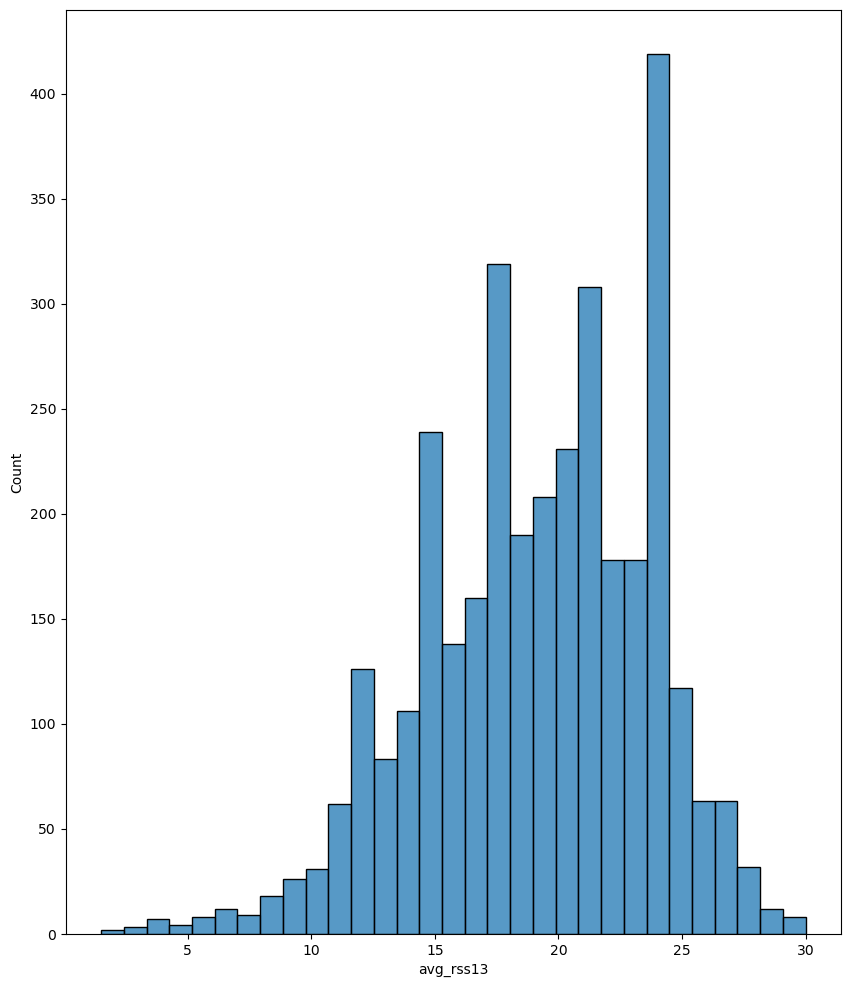

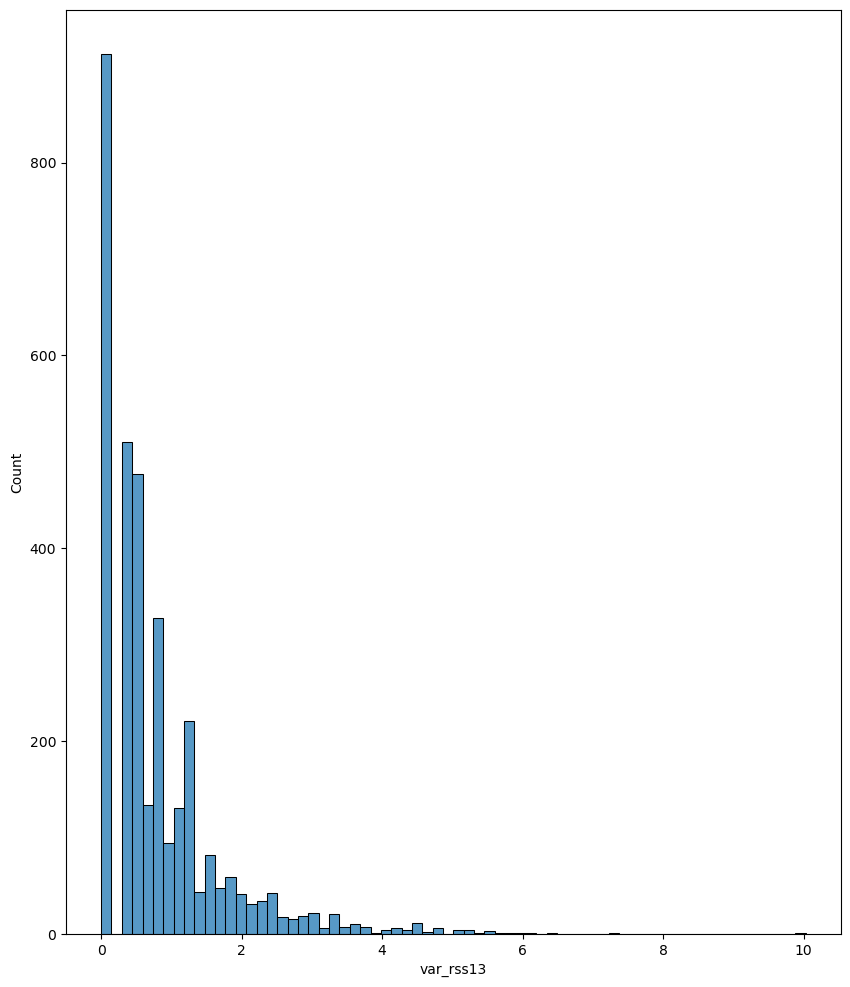

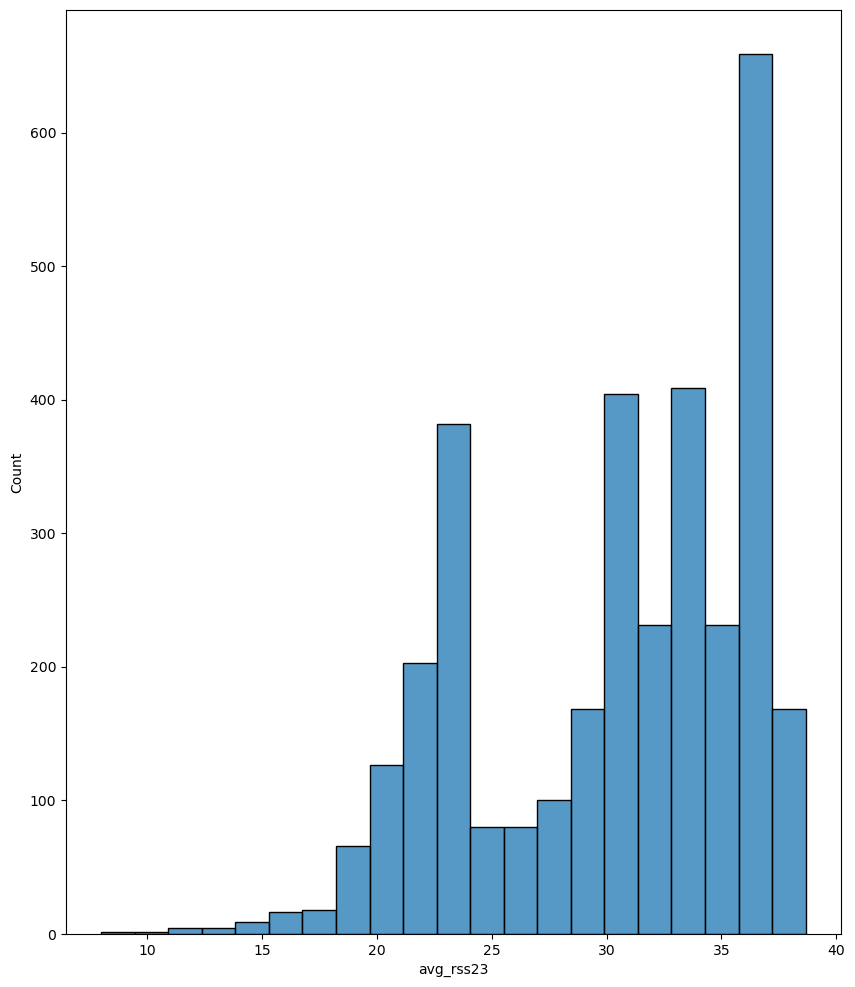

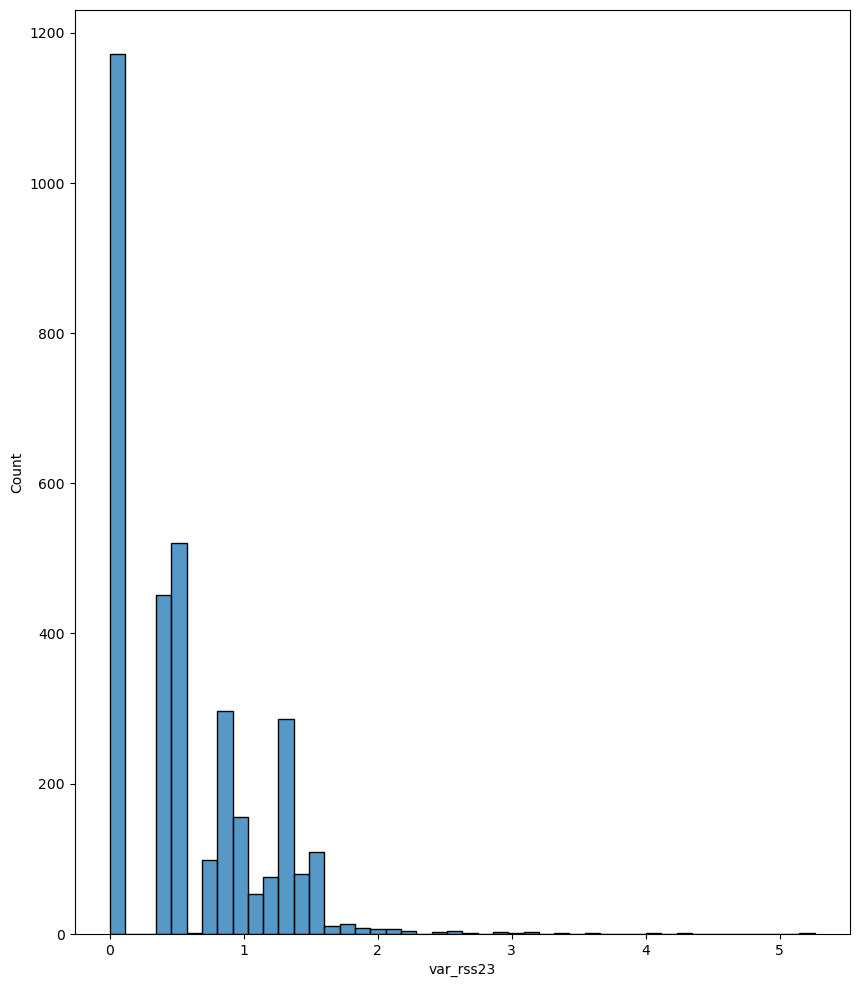

In [15]:
plt.rcParams['figure.figsize'] = (10,12)
for col in bending_1_df.columns:
    if col == "time" or col == "Label":
        pass
    else:
        sns.histplot(data=bending_1_df, x=col)
        plt.show()


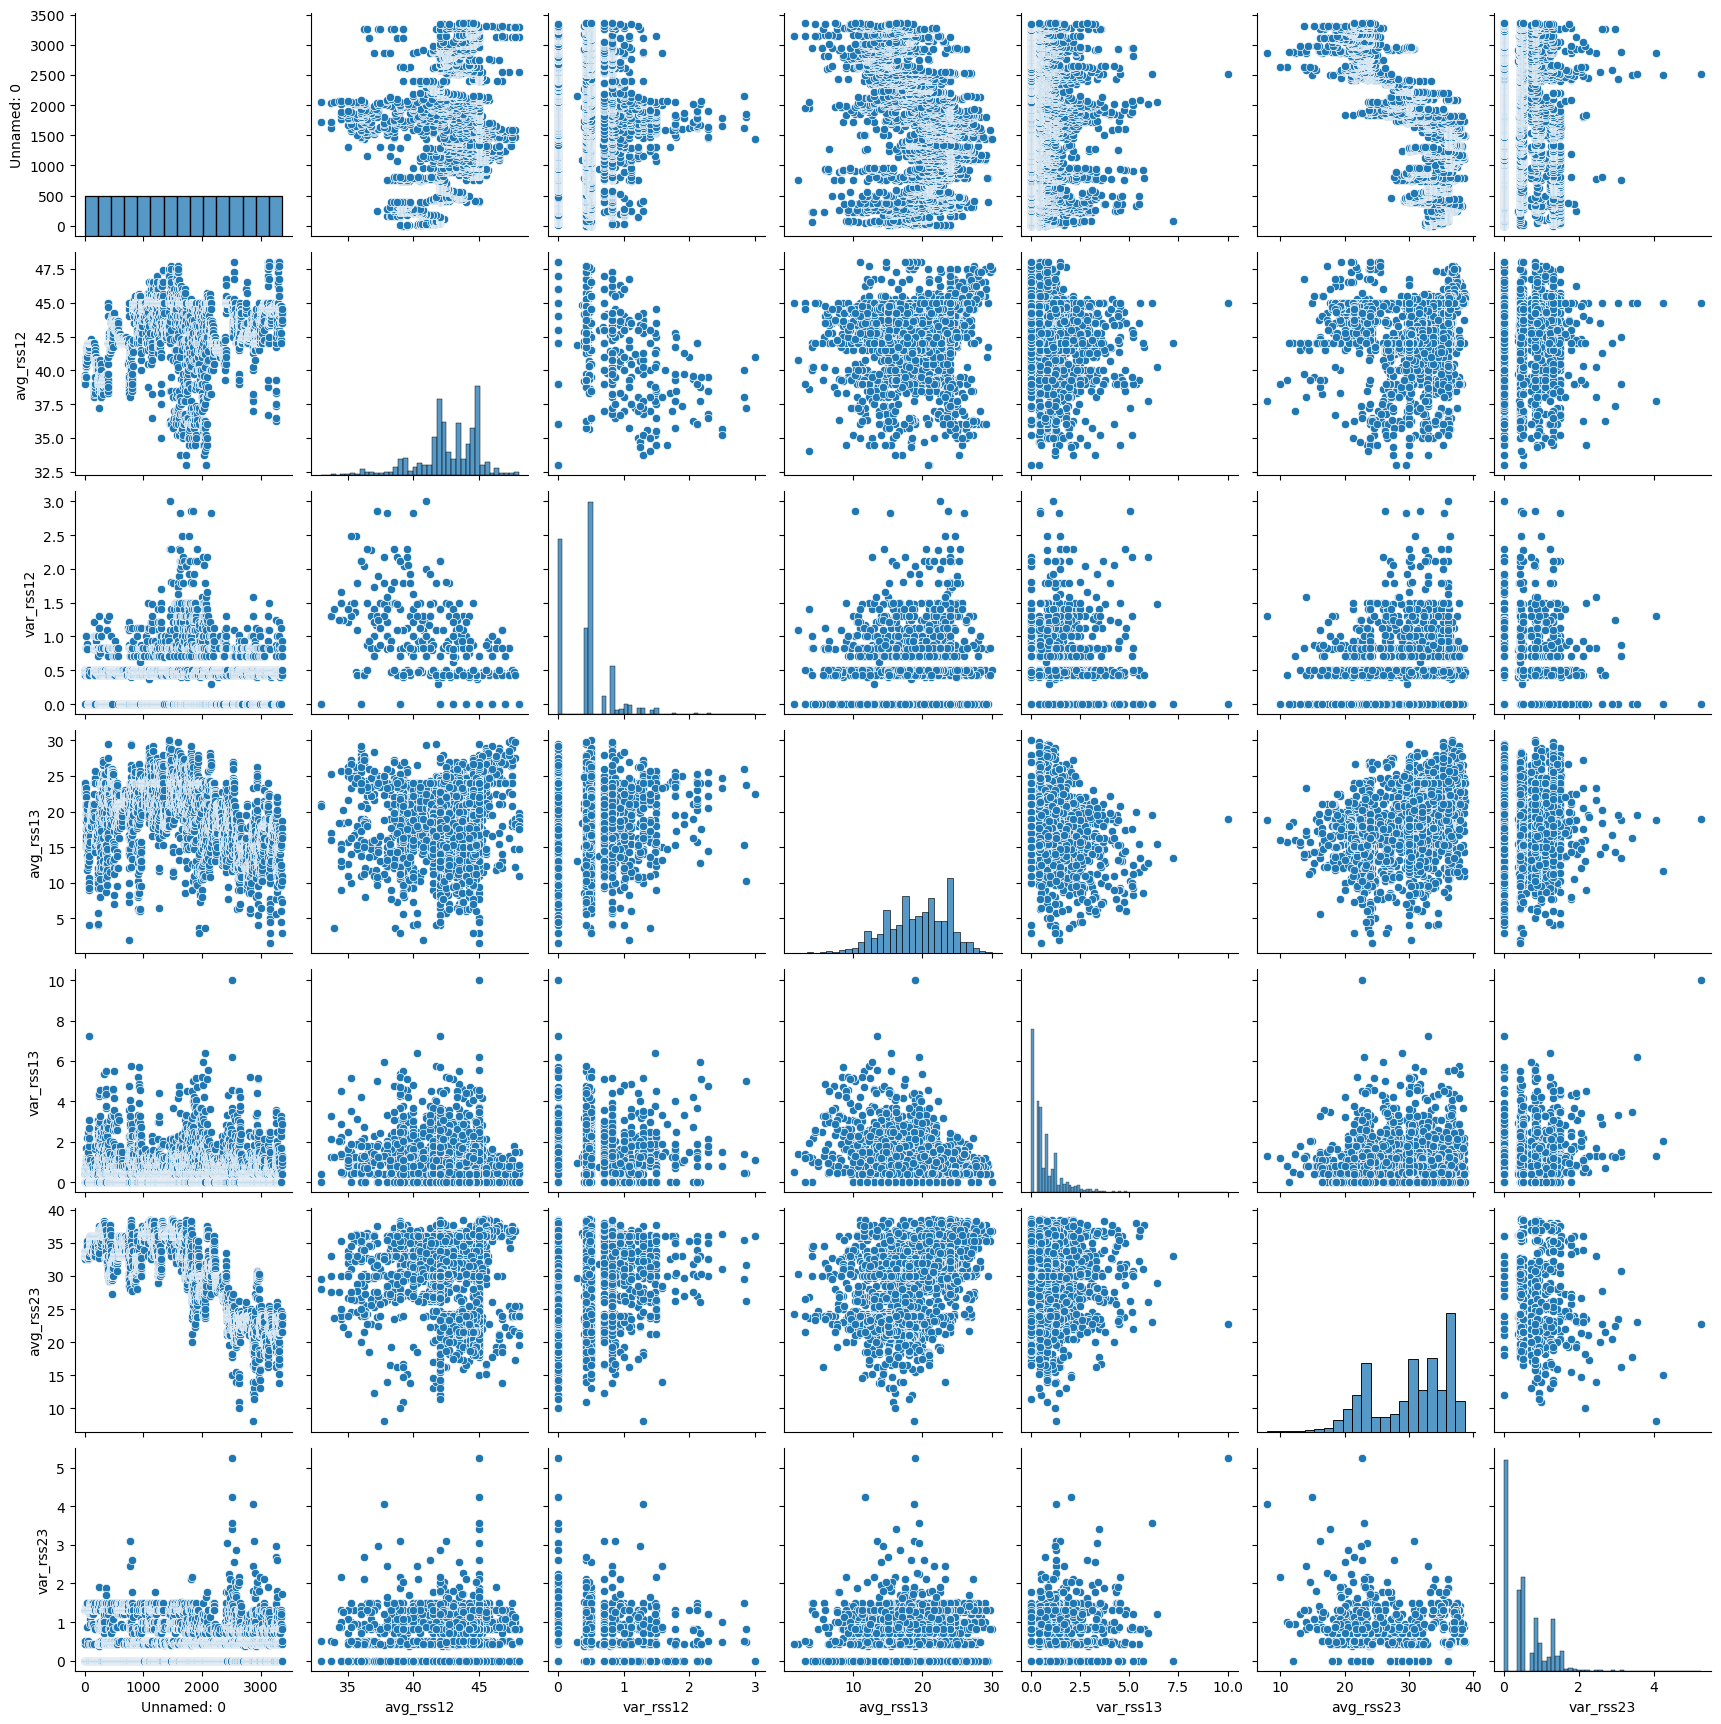

In [16]:
sns.pairplot(data=bending_1_df)
plt.show()


In [28]:
bending_1_df.columns


Index(['Unnamed: 0', 'time', 'avg_rss12', 'var_rss12', 'avg_rss13',
       'var_rss13', 'avg_rss23', 'var_rss23', 'Label'],
      dtype='object')

In [31]:
def outlier(df, threshold):
    outliers = []
    for col in df.columns:
        if col != "Unnamed: 0" and col != "Label" and df[col].dtypes != 'O':
            mean = df[col].mean()
            std = df[col].std()
            z_scores = (df[col] - mean)/std
            col_outliers = df[abs(z_scores) > threshold][col].tolist()
            print(f"The outliers for {col} are {col_outliers}")
            outliers.extend(col_outliers)
    return len(outliers)


In [32]:
outlier(bending_1_df, 3)


The outliers for avg_rss12 are [35.0, 35.25, 35.25, 35.25, 33.75, 35.5, 35.0, 35.25, 33.0, 33.75, 35.0, 34.5, 35.25, 35.25, 35.25, 35.0, 34.5, 35.0, 35.0, 34.67, 34.67, 34.5, 35.25, 35.0, 34.5, 34.5, 35.5, 34.5, 33.75, 34.0, 35.0, 35.25, 33.0, 35.25, 34.33, 34.5, 35.0]
The outliers for var_rss12 are [1.7, 3.0, 2.29, 1.8, 2.29, 1.79, 1.79, 1.73, 1.89, 2.29, 2.0, 2.83, 2.12, 2.28, 2.05, 2.12, 2.12, 1.79, 2.12, 2.49, 2.17, 1.79, 1.79, 2.12, 2.05, 2.12, 1.92, 2.49, 2.12, 1.79, 1.8, 2.86, 1.79, 2.86, 1.92, 2.12, 2.12, 2.29, 2.17, 2.06, 1.79, 2.18, 1.66, 2.83]
The outliers for avg_rss13 are [4.0, 4.0, 4.0, 4.25, 2.0, 3.6, 3.0, 3.67, 4.0, 5.0, 5.0, 1.5, 3.0, 4.5, 4.5, 3.0]
The outliers for var_rss13 are [7.23, 4.27, 4.39, 4.55, 5.34, 4.33, 3.7, 4.64, 4.39, 5.5, 3.77, 4.55, 4.64, 5.5, 4.15, 3.57, 4.76, 3.56, 4.06, 3.67, 5.76, 5.19, 4.85, 5.72, 4.72, 3.91, 4.55, 4.44, 3.7, 4.15, 4.77, 4.44, 4.5, 4.53, 4.02, 5.02, 4.24, 4.02, 3.77, 3.68, 5.15, 4.06, 3.74, 4.72, 3.68, 3.7, 5.21, 4.8, 5.97, 4.21, 

191

In [34]:
outlier(cycling_df, 3)


The outliers for avg_rss12 are [24.25, 23.5, 20.0, 25.0, 18.5, 22.0, 22.0, 21.0, 25.25, 19.0, 22.0, 23.5, 22.25, 24.5, 23.5, 19.25, 23.5, 20.33, 24.25, 22.0, 25.25, 19.0]
The outliers for var_rss12 are [8.58, 10.47, 9.49, 9.12, 10.43, 8.75, 9.25, 8.93, 11.39, 9.5, 9.11, 8.84, 8.79, 8.81, 8.65, 8.98, 9.6, 10.56, 12.6, 9.27, 10.47, 10.47, 9.25, 11.2, 9.55, 10.18, 10.11, 10.11, 9.81, 10.54, 9.11, 9.04, 9.18, 8.58, 8.95, 8.79, 9.91, 12.99, 8.75, 9.04, 11.5, 9.9, 14.17, 10.76, 9.65, 8.6, 12.28, 10.08, 10.53, 10.85, 12.89, 9.12, 12.5, 10.5, 8.58, 9.1, 9.73, 10.84, 10.2, 8.87, 11.12, 8.96, 11.26, 8.76, 8.81, 11.68, 10.87, 10.5, 8.96, 10.5, 8.64]
The outliers for avg_rss13 are [5.5, 5.67, 27.67, 27.0, 5.0, 5.5, 5.5, 27.67, 27.5, 27.5, 27.5, 27.0, 27.0, 28.25, 27.0, 3.0, 27.25, 27.0]
The outliers for var_rss13 are [8.14, 8.41, 10.03, 10.61, 9.63, 9.39, 8.73, 8.23, 8.67, 8.6, 8.1, 9.46, 8.34, 8.96, 8.96, 8.26, 8.73, 8.87, 8.86, 8.17, 8.32, 9.74, 8.23, 8.79, 9.5, 8.65, 8.14, 8.49, 8.34, 9.63, 9.2

220

In [35]:
outlier(lying_df, 3)


The outliers for avg_rss12 are [0.0]
The outliers for var_rss12 are [1.48, 1.48, 1.48, 1.5, 1.79, 1.58, 1.48, 1.48, 1.48, 1.48, 1.48, 1.5, 1.79, 1.58, 1.48, 1.48, 4.33, 2.17, 1.92, 1.48, 8.49, 1.64, 2.59, 2.49, 1.64, 2.59, 2.49, 1.48, 1.48, 1.48, 1.5, 1.79, 1.58, 1.48, 1.48, 1.79, 2.45, 3.11, 3.08, 1.64, 2.74, 1.92, 2.17, 4.85, 2.55, 1.5, 1.58, 3.68, 3.61, 4.33, 2.17, 1.92, 1.48, 8.49, 1.64, 2.59, 2.49, 1.64, 2.59, 2.49]
The outliers for avg_rss13 are [21.5, 23.0, 22.0, 19.25, 21.5, 19.0, 20.67]
The outliers for var_rss13 are [2.68, 3.57, 3.0, 2.87, 3.3, 2.74, 2.59, 3.42, 2.94, 3.3, 5.02, 4.61, 3.24, 2.68, 3.57, 3.0, 2.87, 3.3, 2.74, 2.59, 3.42, 2.94, 3.3, 5.02, 4.61, 3.24, 2.86, 2.62, 2.69, 3.27, 2.62, 3.04, 3.3, 3.27, 3.3, 2.74, 2.69, 5.72, 3.27, 3.84, 2.77, 2.59, 3.99, 3.99, 4.18, 2.69, 3.64, 4.32, 2.62, 2.83, 2.68, 3.5, 2.68, 3.5, 2.68, 3.57, 3.0, 2.87, 3.3, 2.74, 2.59, 3.42, 2.94, 3.3, 5.02, 4.61, 3.24, 3.32, 3.56, 4.32, 2.96, 2.95, 3.49, 2.69, 3.86, 5.91, 4.19, 3.77, 2.74, 2.83, 

341

In [36]:
outlier(standing_df, 3)


The outliers for avg_rss12 are [33.75, 33.33, 35.5, 35.5, 35.5, 35.0, 35.25, 35.5, 35.25, 35.25, 35.25, 35.25, 35.0, 35.4, 35.0, 35.75, 33.75, 33.75, 32.75, 33.0, 34.25, 35.0, 35.25, 35.25, 35.33, 35.0, 30.0, 33.5, 33.75, 33.75, 35.0, 34.5, 35.5, 33.5, 29.75]
The outliers for var_rss12 are [1.79, 3.9, 1.79, 3.27, 1.58, 2.12, 1.79, 1.79, 2.12, 2.12, 1.7, 2.6, 1.79, 1.8, 1.79, 1.58, 1.8, 2.17, 1.64, 2.83, 1.79, 4.5, 2.12, 1.79, 1.79, 1.79, 1.73, 2.18, 2.12, 2.45, 1.79, 3.34, 2.5, 2.77, 1.7, 2.0, 1.7, 2.55, 1.8, 2.95, 1.79, 1.8, 1.79, 1.92, 2.12, 2.12, 1.79, 1.58, 1.79, 2.18, 4.5, 3.35, 1.58, 3.2, 1.8, 3.35, 2.95, 1.89, 2.59, 3.28, 2.12, 4.6, 2.29, 1.66]
The outliers for avg_rss13 are [2.0, 2.67, 2.0, 2.0, 2.5, 2.0, 2.0, 2.5, 2.5, 2.33, 1.5, 1.5, 1.0, 0.0, 1.0, 2.25, 2.0, 2.75, 2.75, 2.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.67, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 2.67, 2.0, 2.67, 0.0, 0.0, 0.0, 1.0, 1.0, 2.5, 1.0, 2.75, 1.0, 2.67, 2.0, 1.5, 2.0, 2.5, 0.0, 0.0, 1.

504

In [37]:
outlier(walking_df, 3)


The outliers for avg_rss12 are [19.33, 19.5, 50.75, 51.25, 19.5, 19.75, 19.5, 20.0, 19.25, 18.67, 12.5, 18.33, 20.0, 15.0, 18.0, 50.25, 49.25, 49.0, 51.0, 18.33, 19.5, 19.33, 18.33, 15.5]
The outliers for var_rss12 are [12.19, 14.5, 13.5, 12.01, 11.79, 13.55, 12.43, 13.47, 11.78, 12.0, 13.48, 14.67, 13.87, 13.47, 11.86, 12.14, 11.76, 12.1, 12.73, 11.9, 12.5, 12.07, 12.47, 12.28, 11.67, 12.47, 14.82, 12.07, 12.26, 13.86, 12.36, 12.97, 12.32, 11.67, 13.05, 12.85, 12.0, 12.53, 12.48, 13.44, 12.5, 13.27, 12.19, 13.48, 15.08, 16.2, 12.03, 12.82, 12.68, 12.08, 12.09, 12.07, 11.72, 12.21, 11.72, 11.97, 12.44, 11.69, 12.48, 12.26, 12.13, 12.38, 12.36, 14.5, 15.37, 12.97, 14.5, 12.14, 12.51, 12.09, 12.68, 17.24]
The outliers for avg_rss13 are [5.5, 6.5, 6.25, 24.25, 6.0, 5.75, 25.25, 5.0, 6.33, 6.5, 24.5, 5.67, 5.0, 6.25, 6.5, 5.5]
The outliers for var_rss13 are [8.73, 8.86, 8.18, 8.26, 8.58, 8.49, 8.19, 9.5, 8.79, 9.0, 9.0, 8.34, 8.22, 8.34, 9.9, 8.64, 8.18, 9.09, 8.18, 9.1, 8.38, 8.15, 9.06, 

209

***FOR THE ORIGINAL DATA***

In [38]:
outlier(data, 3)


The outliers for avg_rss12 are [19.0, 17.5, 15.75, 14.0, 15.0, 15.0, 19.0, 17.25, 18.5, 17.5, 14.0, 19.0, 19.0, 19.75, 13.75, 20.0, 19.0, 12.75, 13.25, 16.75, 17.0, 18.75, 17.25, 17.0, 20.0, 16.0, 18.5, 18.75, 17.5, 19.25, 18.67, 20.0, 18.25, 19.25, 0.0, 17.33, 15.25, 17.67, 18.25, 19.0, 18.75, 20.0, 19.0, 19.33, 19.25, 19.67, 20.0, 20.0, 18.5, 19.0, 19.25, 19.0, 0.0, 19.33, 19.5, 19.5, 19.75, 19.5, 20.0, 19.25, 18.67, 12.5, 18.33, 20.0, 15.0, 18.0, 18.33, 19.5, 19.33, 18.33, 15.5]
The outliers for var_rss12 are [7.76, 9.9, 8.18, 8.58, 7.78, 10.47, 7.85, 9.49, 8.17, 7.7, 9.12, 7.92, 7.85, 8.51, 7.7, 10.43, 8.08, 8.49, 8.75, 9.25, 8.93, 7.79, 11.39, 9.5, 8.01, 9.11, 8.02, 8.84, 7.66, 8.79, 7.82, 8.81, 8.65, 7.82, 8.98, 9.6, 10.56, 12.6, 7.79, 9.27, 7.83, 8.38, 8.17, 8.38, 10.47, 10.47, 7.76, 9.25, 11.2, 7.95, 7.79, 7.71, 9.55, 8.26, 10.18, 10.11, 7.93, 10.11, 9.81, 10.54, 8.5, 8.38, 9.11, 9.04, 9.18, 8.49, 7.63, 8.29, 8.18, 8.58, 8.95, 8.79, 8.16, 9.91, 12.99, 7.85, 8.75, 9.04, 11.5, 9.

2559